<a href="https://colab.research.google.com/github/phoughton/ensign/blob/master/ensign_trainer.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install -Uqq fastbook
import fastbook
fastbook.setup_book()

from fastbook import *


     |████████████████████████████████| 51kB 4.3MB/s 
     |████████████████████████████████| 61kB 6.8MB/s 
     |████████████████████████████████| 1.0MB 20.4MB/s 
     |████████████████████████████████| 358kB 41.9MB/s 
     |████████████████████████████████| 40kB 5.2MB/s 
     |████████████████████████████████| 92kB 9.7MB/s 
     |████████████████████████████████| 10.5MB 46.6MB/s 
     |████████████████████████████████| 61kB 7.0MB/s 
     |████████████████████████████████| 51kB 6.7MB/s 
     |████████████████████████████████| 2.6MB 34.0MB/s 
ERROR: google-colab 1.0.0 has requirement pandas~=1.0.0; python_version >= "3.0", but you'll have pandas 1.1.1 which is incompatible.
Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdriv

In [14]:
key = 'XXX'

In [3]:
image_types = 'jolly rogger','british','french', 'irish', 'netherlands', 'deutschland','scottish'
path = Path('flags')

In [4]:
if not path.exists():
    path.mkdir()
    for o in image_types:
        dest = (path/o.replace(' ', '_'))
        dest.mkdir(exist_ok=True)
        results = search_images_bing(key, f'{o} flag')
        download_images(dest, urls=results.attrgot('content_url'))


 Download of https://cdn.wallpapersafari.com/21/80/DuMJQz.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p flags/irish
$ cd flags/irish
$ wget -c https://cdn.wallpapersafari.com/21/80/DuMJQz.jpg
$ tar xf DuMJQz.jpg
 And re-run your code once the download is successful




 Download of https://cdn.wallpapersafari.com/86/29/Bey91z.jpg has failed after 5 retries
 Fix the download manually:
$ mkdir -p flags/scottish
$ cd flags/scottish
$ wget -c https://cdn.wallpapersafari.com/86/29/Bey91z.jpg
$ tar xf Bey91z.jpg
 And re-run your code once the download is successful


 Download of http://cdn.wallpapersafari.com/91/27/hFR5Dg.png has failed after 5 retries
 Fix the download manually:
$ mkdir -p flags/scottish
$ cd flags/scottish
$ wget -c http://cdn.wallpapersafari.com/91/27/hFR5Dg.png
$ tar xf hFR5Dg.png
 And re-run your code once the download is successful



In [5]:
fns = get_image_files(path)
fns

(#1005) [Path('flags/british/00000040.jpg'),Path('flags/british/00000122.jpg'),Path('flags/british/00000068.jpg'),Path('flags/british/00000058.jpg'),Path('flags/british/00000071.jpg'),Path('flags/british/00000100.jpg'),Path('flags/british/00000048.png'),Path('flags/british/00000002.png'),Path('flags/british/00000111.png'),Path('flags/british/00000138.jpg')...]

In [6]:
failed = verify_images(fns)
failed

(#29) [Path('flags/british/00000116.jpg'),Path('flags/british/00000020.jpg'),Path('flags/british/00000110.png'),Path('flags/british/00000115.jpg'),Path('flags/british/00000050.jpg'),Path('flags/french/00000122.jpg'),Path('flags/french/00000034.jpg'),Path('flags/french/00000026.jpg'),Path('flags/french/00000032.jpg'),Path('flags/french/00000008.jpg')...]

In [7]:
failed.map(Path.unlink);


In [8]:
flags = DataBlock(
    blocks=(ImageBlock, CategoryBlock), 
    get_items=get_image_files, 
    splitter=RandomSplitter(valid_pct=0.2, seed=42),
    get_y=parent_label,
    item_tfms=Resize(128))

dls = flags.dataloaders(path)

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


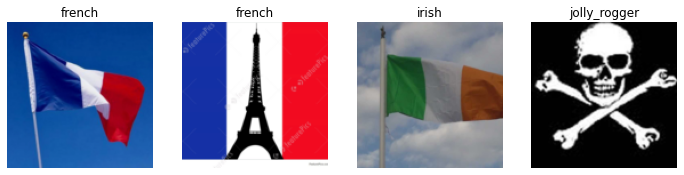

In [9]:
dls.valid.show_batch(max_n=4, nrows=1)

In [10]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(4)

Downloading: "https://download.pytorch.org/models/resnet18-5c106cde.pth" to /root/.cache/torch/hub/checkpoints/resnet18-5c106cde.pth


epoch,train_loss,valid_loss,error_rate,time
0,2.195459,0.833840,0.251282,00:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


epoch,train_loss,valid_loss,error_rate,time
0,0.737946,0.335715,0.087179,00:24
1,0.517916,0.247609,0.071795,00:24
2,0.378449,0.205336,0.051282,00:24
3,0.275472,0.199582,0.051282,00:25


/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency e

/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "
/usr/local/lib/python3.6/dist-packages/PIL/Image.py:932: UserWarning: Palette images with Transparency expressed in bytes should be converted to RGBA images
  "Palette images with Transparency expressed in bytes should be "


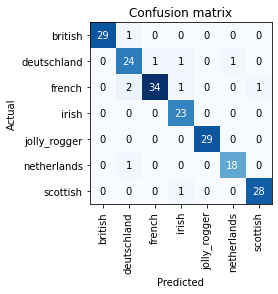

In [11]:
interp = ClassificationInterpretation.from_learner(learn)
interp.plot_confusion_matrix()

In [13]:
learn.export('flag_export.pkl')
path = Path()
path.ls(file_exts='.pkl')

(#1) [Path('flag_export.pkl')]